In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,classification_report

Using TensorFlow backend.


In [2]:
df=pd.read_csv("Imputed.csv")

In [3]:
df

,HINCP_x,SMOCP,PUMA,NP,BDSP,INSP,RMSP,VALP,TAXAMT
0,47900.0,260.0,3108,4,3.0,260.0,6.0,260.0,260.0
1,36100.0,691.0,2501,2,3.0,600.0,6.0,35000.0,525.0
2,100000.0,260.0,3502,1,0.0,260.0,1.0,260.0,260.0
3,45000.0,260.0,3526,2,2.0,260.0,5.0,260.0,260.0
4,88000.0,603.0,1204,3,2.0,20.0,4.0,140.0,525.0
...,...,...,...,...,...,...,...,...,...
246497,30000.0,1366.0,3208,1,4.0,0.0,11.0,150000.0,6500.0
246498,150000.0,2603.0,3208,4,4.0,1200.0,8.0,275000.0,10500.0
246499,85000.0,751.0,2601,2,3.0,550.0,6.0,145000.0,5750.0
246500,117500.0,1168.0,3407,2,4.0,990.0,10.0,500000.0,11500.0


In [4]:
X=df.drop("HINCP_x",axis=1)
y=df["HINCP_x"]

In [5]:
y=np.reshape(y.values,(-1,1))

In [6]:
ss=StandardScaler()
ssy=StandardScaler()
min_max=MinMaxScaler()
min_maxy=MinMaxScaler()



In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8,random_state=2020)

In [83]:
X_train_ss=ss.fit_transform(X_train)
y_train_ss=ssy.fit(y_train)


In [81]:
X_train_mm=min_max.fit_transform(X_train)
y_train_mm=min_maxy.fit(y_train)


In [53]:
model=Sequential()
model.add(Dense(50 ,activation="relu",input_dim=8))
# model.add(Dense(25 ,activation="relu"))
# model.add(Dense(25 ,activation="relu"))
model.add(Dense(25 ,activation="relu"))
model.add(Dense(1, ))#activation='linear'))
model.compile(loss='mse',optimizer="sgd",metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae"])
# add Dropouts layers when overfitting
#SS helps with outliers
#add in l1

# ,input_shape=(8,)

In [48]:
# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
#                            mode='auto')
# callbacks_list = [early_stop]
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                450       
_________________________________________________________________
dense_14 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_15 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 26        
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [85]:
history=model.fit(X_train_ss,y_train,epochs=50,batch_size=50,validation_split=.2)#callbacks=callbacks_list)

Train on 157760 samples, validate on 39441 samples
Epoch 1/50
157760/157760 [==============================] - 3s 16us/step - loss: nan - root_mean_squared_error: nan - mae: nan - val_loss: nan - val_root_mean_squared_error: nan - val_mae: nan
Epoch 2/50
157760/157760 [==============================] - 3s 16us/step - loss: nan - root_mean_squared_error: nan - mae: nan - val_loss: nan - val_root_mean_squared_error: nan - val_mae: nan
Epoch 3/50
157760/157760 [==============================] - 3s 16us/step - loss: nan - root_mean_squared_error: nan - mae: nan - val_loss: nan - val_root_mean_squared_error: nan - val_mae: nan
Epoch 4/50
157760/157760 [==============================] - 3s 16us/step - loss: nan - root_mean_squared_error: nan - mae: nan - val_loss: nan - val_root_mean_squared_error: nan - val_mae: nan
Epoch 5/50
129000/157760 [=======================>......] - ETA: 0s - loss: nan - root_mean_squared_error: nan - mae: nan

KeyboardInterrupt: 

In [56]:
min_maxy.inverse_transform([[.0022]])

array([[-7521.16]])

In [57]:
min_maxy.inverse_transform([[.0020]])

array([[-7855.6]])

In [60]:
(0.0019)**.5

0.04358898943540673

In [33]:
ssy.inverse_transform([.6009])

array([142854.86490422])

dict_keys(['val_loss', 'val_root_mean_squared_error', 'val_mae', 'loss', 'root_mean_squared_error', 'mae'])


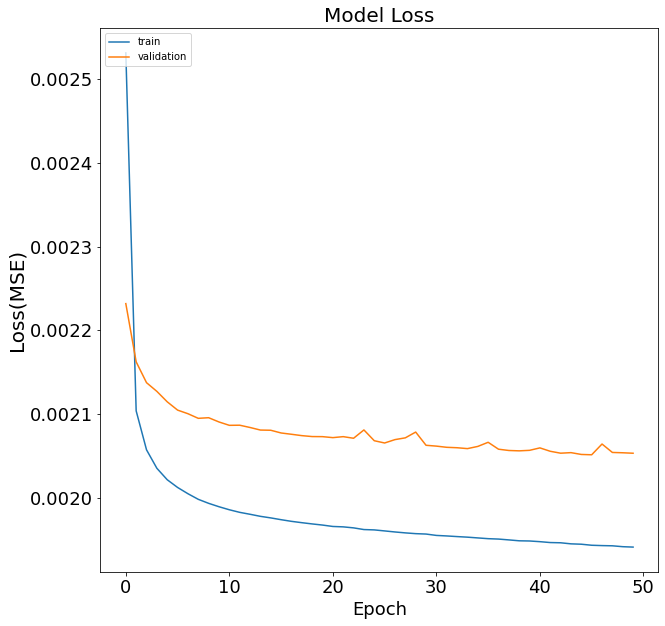

In [76]:
print(history.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
plt.savefig("model results",transparent=True,bbox_inches="tight",)
plt.show();

In [60]:
y_test

array([[35000.],
       [55100.],
       [69100.],
       ...,
       [88400.],
       [75100.],
       [ 4980.]])

In [59]:
# y_test_ss=ss.transform(y_test)
# X_test_ss=ss.transform(X_test)
y_test_mm=min_maxy.transform(y_test)
X_test_mm=min_max.transform(X_test)

In [61]:
y_hat=model.predict(X_test_mm)

In [62]:
y_hat

array([[0.03756016],
       [0.05570848],
       [0.04519601],
       ...,
       [0.04217846],
       [0.067249  ],
       [0.01736517]], dtype=float32)

In [64]:
# y_test_mm=min_max.inverse_transform(y)
#invert normalize
# X_test_mm=min_max.inverse_transform(X_test_mm)
y_hat=min_maxy.inverse_transform(y_hat)
# X_test_ss=ss.inverse_transform(X_test_ss)
print("X inputs=%s ,Actual=%s, Predictied=%s" % (X_test.values[0],y_test[0],y_hat[0]))
# print(y_hat[0:20])
# mae=avergae diff between predicted and actual

X inputs=[2.600e+02 3.529e+03 2.000e+00 2.000e+00 2.600e+02 4.000e+00 2.600e+02
 2.600e+02] ,Actual=[35000.], Predictied=[51608.098]


In [65]:
X_test

,SMOCP,PUMA,NP,BDSP,INSP,RMSP,VALP,TAXAMT
238940,260.0,3529,2,2.0,260.0,4.0,260.0,260.0
88724,1965.0,3525,1,1.0,300.0,3.0,240000.0,2950.0
213889,434.0,2200,3,4.0,0.0,9.0,100000.0,1850.0
156991,2867.0,3504,7,3.0,2000.0,7.0,350000.0,8500.0
183801,1275.0,3503,2,1.0,1200.0,3.0,250000.0,425.0
...,...,...,...,...,...,...,...,...
147745,748.0,2501,2,2.0,600.0,4.0,40000.0,1650.0
49390,216.0,2200,1,3.0,750.0,8.0,50000.0,0.0
201663,530.0,2300,2,3.0,870.0,5.0,185000.0,2950.0
34087,1361.0,104,3,3.0,0.0,5.0,170000.0,3650.0


In [116]:
# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
#                            mode='auto')
# callbacks_list = [early_stop]
# history_es = model_es.fit(X_train_s, np.array(y_train),
#                           validation_data=(X_test_s, np.array(y_test)),
#                          epochs=40, batch_size=None, callbacks=callbacks_list)